In [2]:
#importing requires libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading the data
zoo_data = pd.read_csv('Zoo.csv')
zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
zoo_data.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

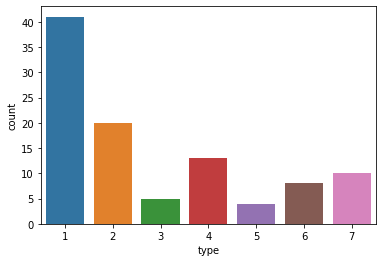

In [7]:
sns.countplot(zoo_data['type']);

## Using pca to reduce features

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

scaled_data = zoo_data.iloc[:,1:]
scaled_data = scale(scaled_data)

pca = PCA(n_components=9)
pca_values= pca.fit_transform(scaled_data)

In [9]:
p1=pca_values[0]
p2=pca_values[1]
p3=pca_values[2]

In [10]:
var=pca.explained_variance_ratio_
var

array([0.31140457, 0.19656175, 0.15808491, 0.07274227, 0.0562927 ,
       0.04390317, 0.0331517 , 0.03057921, 0.0264896 ])

In [11]:
 np.cumsum(np.round(var,decimals = 4)*100)

array([31.14, 50.8 , 66.61, 73.88, 79.51, 83.9 , 87.22, 90.28, 92.93])

*We have used PCA and reduced the features but we need consider atleast 7 pca's for proper representation of our data,and we cannot visualize with 7 features.*

In [12]:
X= zoo_data.iloc[:,1:17]
Y= zoo_data['type']

## Grid Search 

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (10, 15,5,20,25),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

In [15]:
grid = GridSearchCV(estimator_KNN,parameters_KNN,cv=10, scoring='accuracy')
grid.fit(X,Y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': (20, 40, 1),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': (10, 15, 5, 20, 25), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [16]:
grid.best_params_,grid.best_score_

({'leaf_size': 20,
  'metric': 'minkowski',
  'n_neighbors': 5,
  'p': 1,
  'weights': 'distance'},
 0.95)

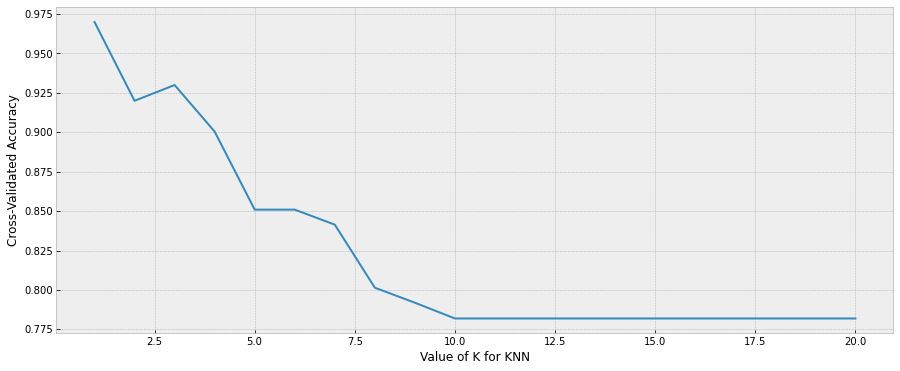

In [17]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
%matplotlib inline
# choose k between 1 to 20
k_range = range(1, 21)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.style.use('bmh')
plt.figure(figsize=(15,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Building model

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,Y)

KNeighborsClassifier()

In [19]:
predictions=knn.predict(X)
predictions

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 6, 4, 1, 1, 4, 7, 2, 2, 4, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 1, 5, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [20]:
#checking accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y,predictions)
accuracy

0.9504950495049505

In [21]:
#model validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf=KFold(n_splits=5)
model=KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(model,X,Y,cv=kf)
print("The accuracy of the model is {}".format(score.mean()))

The accuracy of the model is 0.8614285714285714
